In [267]:
%pip install httpx
%pip install pandas
%pip install scipy
%pip install matplotlib
%pip install tables
%pip install scikit-learn



Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


^C
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [97]:
import io
import math

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import matplotlib.lines as mlines
from scipy.spatial import transform as scipy_transform
from datetime import datetime

In [98]:
import os
os.environ['CLICKHOUSE_USER']= 'backend'
os.environ ['CLICKHOUSE_PASSWORD']='rB0jh2YjzNOaB7'
link = 'http://api.sensorehab.com:8123'
os.environ ['CLICKHOUSE_URL']=link
import httpx


class Clickhouse:
    credentials = {
        "user": os.environ['CLICKHOUSE_USER'],
        "password": os.environ['CLICKHOUSE_PASSWORD'],
    }
    url = os.environ['CLICKHOUSE_URL']

    def __init__(self):
        self._httpx_client = httpx.Client()

    def post(
        self,
        query: str,
        headers: dict = None,
        content: bytes = None,
    ) -> str:
        response = self._httpx_client.post(
            url=self.url,
            params={
                "query": query,
                **self.credentials,
            },
            headers=headers,
            content=content,
        )
        return response.text

    def get(
        self,
        query: str,
        headers: dict = None,
    ) -> str:
        response = self._httpx_client.get(
            url=self.url,
            params={
                "query": query,
                **self.credentials,
            },
            headers=headers,
        )
        return response.text


In [99]:
df = None
df = pd.read_hdf('.\data\dataset_gross_prod.h5')
print ('HI')

HI


In [275]:
df.head(30000)

,game_result_id,game_id,patient_id,exercise_id,timestamp,src,side,h_rssi,h_gain,g_rssi,...,shoulder_quat_w,shoulder_lia_x,shoulder_lia_y,shoulder_lia_z,shoulder_grv_x,shoulder_grv_y,shoulder_grv_z,shoulder_tilt,position_type,forearm_y_ang
0,13237,12,588,7,1991-11-02 23:44:14,00:00:00:00:00:00,1,0,0,0,...,0.556285,-0.081,-0.260,0.203,-8.744,-4.368,-2.190,0.0,0,-69.104216
1,13237,12,588,7,1991-11-02 23:44:29,00:00:00:00:00:00,1,0,0,0,...,0.556392,0.036,0.012,-0.030,-8.391,-4.540,-2.152,0.0,0,-69.387333
2,13237,12,588,7,1991-11-02 23:44:42,00:00:00:00:00:00,1,0,0,0,...,0.552338,-0.008,0.319,0.006,-8.295,-4.864,-2.000,0.0,0,-69.699882
3,13237,12,588,7,1991-11-02 23:44:58,00:00:00:00:00:00,1,0,0,0,...,0.551843,0.020,0.337,0.028,-8.294,-4.902,-2.019,0.0,0,-69.699469
4,13237,12,588,7,1991-11-02 23:45:15,00:00:00:00:00:00,1,0,0,0,...,0.551413,-0.087,0.310,-0.015,-8.299,-4.850,-1.910,0.0,0,-69.695340
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,13289,12,618,7,1992-03-29 03:50:05,00:00:00:00:00:00,2,0,0,0,...,-0.234243,-0.109,0.039,0.128,-7.135,-5.773,-3.813,0.0,0,-44.006015
29996,13289,12,618,7,1992-03-29 03:50:22,00:00:00:00:00:00,2,0,0,0,...,-0.234041,-0.112,0.043,0.128,-7.135,-5.773,-3.813,0.0,0,-43.965782
29997,13289,12,618,7,1992-03-29 03:50:38,00:00:00:00:00:00,2,0,0,0,...,-0.233398,-0.158,0.062,0.166,-7.192,-5.763,-3.823,0.0,0,-43.936141
29998,13289,12,618,7,1992-03-29 03:50:55,00:00:00:00:00:00,2,0,0,0,...,-0.232953,-0.141,0.114,0.098,-7.154,-5.744,-3.746,0.0,0,-43.935944


In [101]:
def calc_ang_to_Y(row):
    w, x, y, z = row.to_list()
    rotation = scipy_transform.Rotation.from_quat([x, y, z, w])
    vec = rotation.apply([0, 1, 0])
    rad_angle = np.arcsin(vec[2])
    deg_angle = math.degrees(rad_angle)
    return -deg_angle

In [102]:
forearm_quat = [
    'forearm_quat_x', 
    'forearm_quat_y', 
    'forearm_quat_z', 
    'forearm_quat_w',
]
df['forearm_y_ang'] = df[forearm_quat].apply(calc_ang_to_Y, axis=1)
df['forearm_y_ang'].head(5)

0   -69.104216
1   -69.387333
2   -69.699882
3   -69.699469
4   -69.695340
Name: forearm_y_ang, dtype: float64

In [244]:
#Добавление элемента в массив маркеров
def add_sorted_marker_position(mark_locs, position):
    if not start_mark_locs:
        start_mark_locs.append(position)
    else:
        index = 0
        while index < len(mark_locs) and mark_locs[index] < position:
            index += 1
        mark_locs.insert(index, position)
    return mark_locs

In [245]:
#Удаление элемента из массива маркеров
def remove_marker_by_index(start_mark_locs, index):
    del start_mark_locs[index]
    return start_mark_locs

In [290]:
def plot_game_result(result_id, patient_id, frame_range=(0,-1)):
    defprops = {
        'xdata': [],
        'ydata': [],
        'linestyle': 'None',
        'markersize': 10
    }
    black_arrow = mlines.Line2D(
        **defprops,
        marker='^',
        color='black',
        label='start position',
    )
    red_arrow = mlines.Line2D(
        **defprops,
        marker='v',
        color='red',
        label='end position',
    )
    plt.legend(handles=[black_arrow, red_arrow])

    result_df = df.loc[df['game_result_id'] == result_id].reset_index(drop=True)
    
    assert len(exercise_ids := result_df['exercise_id'].unique()) == 1
    #assert len(game_ids := result_df['game_id'].unique()) == 1

    exercise_id = exercise_ids[0]


    # 'ArrowDown' positionType = 1;
    start_mark_locs = result_df.loc[result_df['position_type'] == 1].index
    # 'ArrowUp' positionType = 2;
    end_mark_locs = result_df.loc[result_df['position_type'] == 2].index    
    if frame_range:
        
        start_mark_locs = [i - frame_range[0] for i in start_mark_locs]
        #start_mark_locs = remove_marker_by_index(start_mark_locs, 2)
        end_mark_locs = [i - frame_range[0] for i in end_mark_locs]
        #end_mark_locs = remove_marker_by_index(end_mark_locs, 10)
    result_df['forearm_y_ang'].plot(
        title= f'patient {patient_id}, result {result_id}, exercise {exercise_id}',
        figsize=(25, 6),
        color='tab:blue',
        marker='^',
        markersize=10,
        markerfacecolor='black',
        markevery=start_mark_locs,
    )
    ax = result_df['forearm_y_ang'].plot(
        figsize=(25, 6),
        color='tab:blue',
        marker='v',
        markersize=10,
        markerfacecolor='red',
        markevery=end_mark_locs,

    )


    #start_mark_locs = add_sorted_marker_position(start_mark_locs, 650)
    tick_range_x = range(0, 12000, 300)
    plt.xticks(tick_range_x)
    new_figure=True
    if new_figure:
        plt.figure()

###################
#ИЗМЕНЕННЫЙ ГРАФИК#
###################

    defprops = {
        'xdata': [],
        'ydata': [],
        'linestyle': 'None',
        'markersize': 10
    }
    black_arrow = mlines.Line2D(
        **defprops,
        marker='^',
        color='black',
        label='start position',
    )
    red_arrow = mlines.Line2D(
        **defprops,
        marker='v',
        color='red',
        label='end position',
    )
    plt.legend(handles=[black_arrow, red_arrow])

    result_df = df.loc[df['game_result_id'] == result_id].reset_index(drop=True)
    
    assert len(exercise_ids := result_df['exercise_id'].unique()) == 1
    #assert len(game_ids := result_df['game_id'].unique()) == 1

    exercise_id = exercise_ids[0]


    # 'ArrowDown' positionType = 1;
    start_mark_locs = result_df.loc[result_df['position_type'] == 1].index
    # 'ArrowUp' positionType = 2;
    end_mark_locs = result_df.loc[result_df['position_type'] == 2].index    
    if frame_range:
        
        start_mark_locs = [i - frame_range[0] for i in start_mark_locs]
        #start_mark_locs = remove_marker_by_index(start_mark_locs, 2)
        end_mark_locs = [i - frame_range[0] for i in end_mark_locs]
        #end_mark_locs = remove_marker_by_index(end_mark_locs, 10)
    result_df['forearm_y_ang'].plot(
        title= f'patient {patient_id}, result {result_id}, exercise {exercise_id}',
        figsize=(25, 6),
        color='tab:blue',
        marker='^',
        markersize=10,
        markerfacecolor='black',
        markevery=start_mark_locs,
    )
    ax = result_df['forearm_y_ang'].plot(
        figsize=(25, 6),
        color='tab:blue',
        marker='v',
        markersize=10,
        markerfacecolor='red',
        markevery=end_mark_locs,

    )

    #Добавление и удаление маркеров
    start_mark_locs = add_sorted_marker_position(end_mark_locs, 650)
    end_mark_locs = add_sorted_marker_position(end_mark_locs, 1000)
    #end_mark_locs = remove_marker_by_index(end_mark_locs, 2)
    tick_range_x = range(0, 12000, 300)
    plt.xticks(tick_range_x)
    plt.figure()
   

AssertionError: 

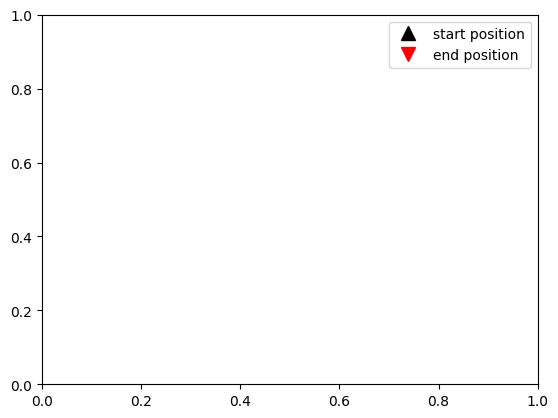

In [291]:
plot_game_result(13233, 588) 

In [ ]:
def plot_game_result(result_id, patient_id, frame_range=(0,-1)):
    defprops = {
        'xdata': [],
        'ydata': [],
        'linestyle': 'None',
        'markersize': 10
    }
    black_arrow = mlines.Line2D(
        **defprops,
        marker='^',
        color='black',
        label='start position',
    )
    red_arrow = mlines.Line2D(
        **defprops,
        marker='v',
        color='red',
        label='end position',
    )
    plt.legend(handles=[black_arrow, red_arrow])

    result_df = df.loc[df['game_result_id'] == result_id].reset_index(drop=True)
    
    assert len(exercise_ids := result_df['exercise_id'].unique()) == 1

    exercise_id = exercise_ids[0]


    # 'ArrowDown' positionType = 1;
    start_mark_locs = result_df.loc[result_df['position_type'] == 1].index
    # 'ArrowUp' positionType = 2;
    end_mark_locs = result_df.loc[result_df['position_type'] == 2].index    
    if frame_range:
        
        start_mark_locs = [i - frame_range[0] for i in start_mark_locs]
        #start_mark_locs = remove_marker_by_index(start_mark_locs, 2)
        end_mark_locs = [i - frame_range[0] for i in end_mark_locs]
        #end_mark_locs = remove_marker_by_index(end_mark_locs, 10)
    result_df['forearm_y_ang'].plot(
        title= f'patient {patient_id}, result {result_id}, exercise {exercise_id}',
        figsize=(25, 6),
        color='tab:blue',
        marker='^',
        markersize=10,
        markerfacecolor='black',
        markevery=start_mark_locs,
    )
    ax = result_df['forearm_y_ang'].plot(
        figsize=(25, 6),
        color='tab:blue',
        marker='v',
        markersize=10,
        markerfacecolor='red',
        markevery=end_mark_locs,

    )


    #start_mark_locs = add_sorted_marker_position(start_mark_locs, 650)
    tick_range_x = range(0, 12000, 300)
    plt.xticks(tick_range_x)
    new_figure=True
    if new_figure:
        plt.figure()


    defprops = {
        'xdata': [],
        'ydata': [],
        'linestyle': 'None',
        'markersize': 10
    }
    black_arrow = mlines.Line2D(
        **defprops,
        marker='^',
        color='black',
        label='start position',
    )
    red_arrow = mlines.Line2D(
        **defprops,
        marker='v',
        color='red',
        label='end position',
    )
    plt.legend(handles=[black_arrow, red_arrow])

    result_df = df.loc[df['game_result_id'] == result_id].reset_index(drop=True)
    
    assert len(exercise_ids := result_df['exercise_id'].unique()) == 1

    exercise_id = exercise_ids[0]


    # 'ArrowDown' positionType = 1;
    start_mark_locs = result_df.loc[result_df['position_type'] == 1].index
    # 'ArrowUp' positionType = 2;
    end_mark_locs = result_df.loc[result_df['position_type'] == 2].index    
    if frame_range:
        
        start_mark_locs = [i - frame_range[0] for i in start_mark_locs]
        #start_mark_locs = remove_marker_by_index(start_mark_locs, 2)
        end_mark_locs = [i - frame_range[0] for i in end_mark_locs]
        #end_mark_locs = remove_marker_by_index(end_mark_locs, 10)
    result_df['forearm_y_ang'].plot(
        title= f'patient {patient_id}, result {result_id}, exercise {exercise_id}',
        figsize=(25, 6),
        color='tab:blue',
        marker='^',
        markersize=10,
        markerfacecolor='black',
        markevery=start_mark_locs,
    )
    ax = result_df['forearm_y_ang'].plot(
        figsize=(25, 6),
        color='tab:blue',
        marker='v',
        markersize=10,
        markerfacecolor='red',
        markevery=end_mark_locs,

    )


    #start_mark_locs = add_sorted_marker_position(start_mark_locs, 650)
    #end_mark_locs = remove_marker_by_index(end_mark_locs, 2)
    tick_range_x = range(0, 12000, 300)
    plt.xticks(tick_range_x)
    plt.figure()

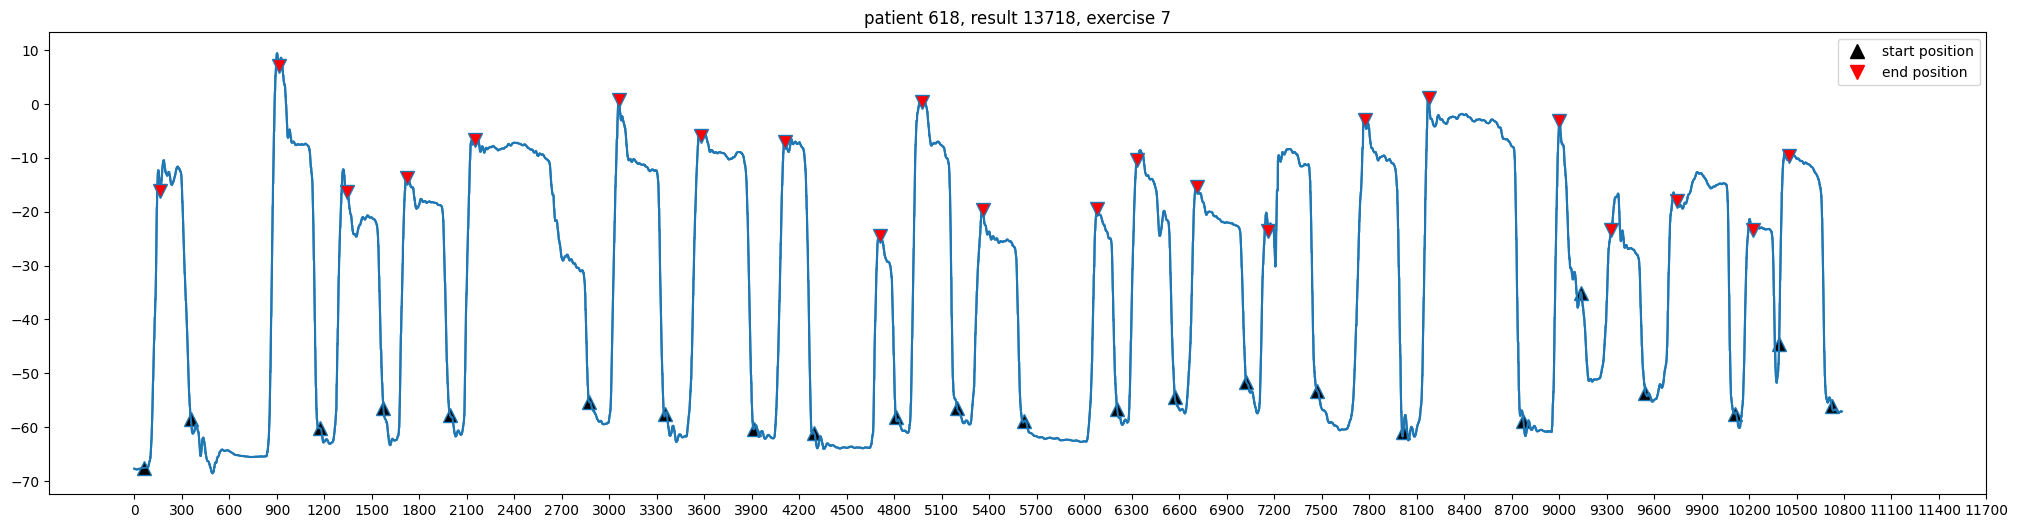

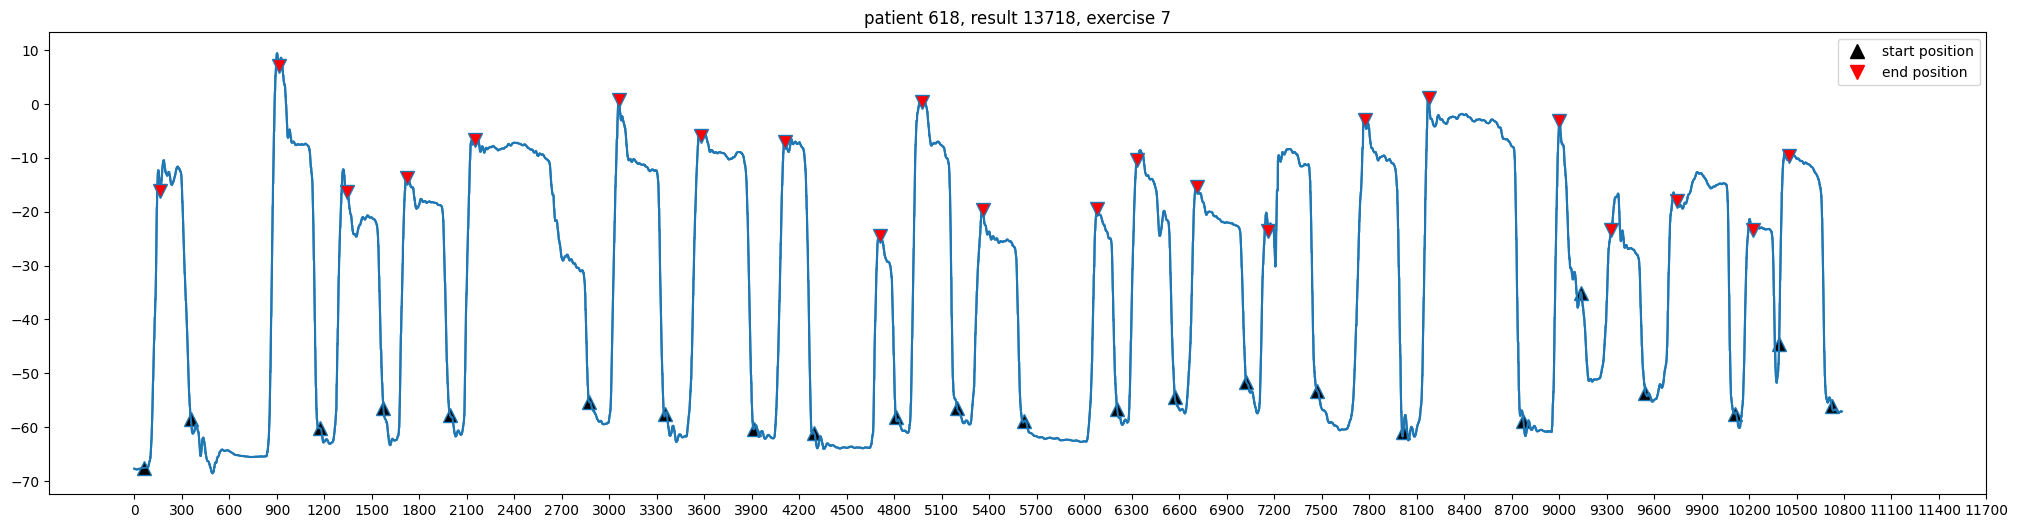

<Figure size 640x480 with 0 Axes>

In [ ]:
plot_game_result(13718, 618) 